In [166]:
import pandas as pd
import os
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [167]:
import mlflow

remote_server_uri = "databricks" # set to your server URI
mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment("/my-experiment")

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/173139626917049', experiment_id='173139626917049', lifecycle_stage='active', name='/my-experiment', tags={'mlflow.experiment.sourceName': '/my-experiment',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'shivanshug14+unsub@gmail.com',
 'mlflow.ownerId': '3176862807905950'}>

# Importing Dataset

In [168]:
df = pd.read_csv('/Users/sg/projects/EDS-I-Group-Project/data/family_stores_unit_sales.csv')

In [169]:
df

,family,store_nbr,year_week,unit_sales,type
0,BEVERAGES,10,201301,4349.000,C
1,BEVERAGES,10,201302,3126.000,C
2,BEVERAGES,10,201303,3001.000,C
3,BEVERAGES,10,201304,2895.000,C
4,BEVERAGES,10,201305,3037.000,C
...,...,...,...,...,...
12667,PRODUCE,46,201729,20780.453,A
12668,PRODUCE,46,201730,20640.608,A
12669,PRODUCE,46,201731,22673.837,A
12670,PRODUCE,46,201732,19426.986,A


In [170]:
df = df[df['type'] == 'B'].reset_index(drop = True)

In [171]:
df

,family,store_nbr,year_week,unit_sales,type
0,BEVERAGES,20,201507,6328.000,B
1,BEVERAGES,20,201508,11454.000,B
2,BEVERAGES,20,201509,8118.000,B
3,BEVERAGES,20,201510,7569.000,B
4,BEVERAGES,20,201511,7048.000,B
...,...,...,...,...,...
1563,PRODUCE,20,201729,7841.258,B
1564,PRODUCE,20,201730,7592.135,B
1565,PRODUCE,20,201731,8313.795,B
1566,PRODUCE,20,201732,6976.563,B


In [172]:
df.type.value_counts()

B    1568
Name: type, dtype: int64

In [173]:
df.family.value_counts()

BREAD/BAKERY            133
CLEANING                133
DELI                    133
GROCERY I               133
EGGS_AND_DAIRY          133
LIQUOR,WINE,BEER        133
POULTRY_MEATS           133
FROZEN_PREPARED_FOOD    133
PERSONAL CARE           133
BEVERAGES               133
HOME CARE               121
PRODUCE                 117
Name: family, dtype: int64

In [174]:
df.store_nbr.value_counts()

20    1568
Name: store_nbr, dtype: int64

Drop type and store_nbr since they are the same for all

In [175]:
df = df.drop(['store_nbr', 'type'], axis = 1)

In [176]:
df

,family,year_week,unit_sales
0,BEVERAGES,201507,6328.000
1,BEVERAGES,201508,11454.000
2,BEVERAGES,201509,8118.000
3,BEVERAGES,201510,7569.000
4,BEVERAGES,201511,7048.000
...,...,...,...
1563,PRODUCE,201729,7841.258
1564,PRODUCE,201730,7592.135
1565,PRODUCE,201731,8313.795
1566,PRODUCE,201732,6976.563


In [177]:
# check for null values
df.isna().sum()

family        0
year_week     0
unit_sales    0
dtype: int64

# Time Series Forecasting

In [178]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Change year_week to datetime format, then make it the index of the dataframe

In [179]:
year_list = []
for i in range(len(df['year_week'])):
    year_list.append(str(list(df['year_week'])[i])[:4])
# print(year_list)

In [180]:
week_list = []
for i in range(len(df['year_week'])):
    week_list.append(str(list(df['year_week'])[i])[4:])
# print(week_list)

In [181]:
df['year'] = year_list
df

,family,year_week,unit_sales,year
0,BEVERAGES,201507,6328.000,2015
1,BEVERAGES,201508,11454.000,2015
2,BEVERAGES,201509,8118.000,2015
3,BEVERAGES,201510,7569.000,2015
4,BEVERAGES,201511,7048.000,2015
...,...,...,...,...
1563,PRODUCE,201729,7841.258,2017
1564,PRODUCE,201730,7592.135,2017
1565,PRODUCE,201731,8313.795,2017
1566,PRODUCE,201732,6976.563,2017


In [182]:
df['week'] = week_list
df

,family,year_week,unit_sales,year,week
0,BEVERAGES,201507,6328.000,2015,07
1,BEVERAGES,201508,11454.000,2015,08
2,BEVERAGES,201509,8118.000,2015,09
3,BEVERAGES,201510,7569.000,2015,10
4,BEVERAGES,201511,7048.000,2015,11
...,...,...,...,...,...
1563,PRODUCE,201729,7841.258,2017,29
1564,PRODUCE,201730,7592.135,2017,30
1565,PRODUCE,201731,8313.795,2017,31
1566,PRODUCE,201732,6976.563,2017,32


In [183]:
df['year'] = df['year'].astype(int)
df

,family,year_week,unit_sales,year,week
0,BEVERAGES,201507,6328.000,2015,07
1,BEVERAGES,201508,11454.000,2015,08
2,BEVERAGES,201509,8118.000,2015,09
3,BEVERAGES,201510,7569.000,2015,10
4,BEVERAGES,201511,7048.000,2015,11
...,...,...,...,...,...
1563,PRODUCE,201729,7841.258,2017,29
1564,PRODUCE,201730,7592.135,2017,30
1565,PRODUCE,201731,8313.795,2017,31
1566,PRODUCE,201732,6976.563,2017,32


In [184]:
df['week'] = df['week'].astype(int)
df

,family,year_week,unit_sales,year,week
0,BEVERAGES,201507,6328.000,2015,7
1,BEVERAGES,201508,11454.000,2015,8
2,BEVERAGES,201509,8118.000,2015,9
3,BEVERAGES,201510,7569.000,2015,10
4,BEVERAGES,201511,7048.000,2015,11
...,...,...,...,...,...
1563,PRODUCE,201729,7841.258,2017,29
1564,PRODUCE,201730,7592.135,2017,30
1565,PRODUCE,201731,8313.795,2017,31
1566,PRODUCE,201732,6976.563,2017,32


In [185]:
# make date column that includes year, week, and day
dates = df['year']*100 + df['week']
df['date'] = pd.to_datetime(dates.astype(str) + '0', format = '%Y%W%w')
df

,family,year_week,unit_sales,year,week,date
0,BEVERAGES,201507,6328.000,2015,7,2015-02-22
1,BEVERAGES,201508,11454.000,2015,8,2015-03-01
2,BEVERAGES,201509,8118.000,2015,9,2015-03-08
3,BEVERAGES,201510,7569.000,2015,10,2015-03-15
4,BEVERAGES,201511,7048.000,2015,11,2015-03-22
...,...,...,...,...,...,...
1563,PRODUCE,201729,7841.258,2017,29,2017-07-23
1564,PRODUCE,201730,7592.135,2017,30,2017-07-30
1565,PRODUCE,201731,8313.795,2017,31,2017-08-06
1566,PRODUCE,201732,6976.563,2017,32,2017-08-13


In [186]:
df = df.drop(['year_week', 'year', 'week'], axis = 1)
df

,family,unit_sales,date
0,BEVERAGES,6328.000,2015-02-22
1,BEVERAGES,11454.000,2015-03-01
2,BEVERAGES,8118.000,2015-03-08
3,BEVERAGES,7569.000,2015-03-15
4,BEVERAGES,7048.000,2015-03-22
...,...,...,...
1563,PRODUCE,7841.258,2017-07-23
1564,PRODUCE,7592.135,2017-07-30
1565,PRODUCE,8313.795,2017-08-06
1566,PRODUCE,6976.563,2017-08-13


In [187]:
df.family.value_counts()

BREAD/BAKERY            133
CLEANING                133
DELI                    133
GROCERY I               133
EGGS_AND_DAIRY          133
LIQUOR,WINE,BEER        133
POULTRY_MEATS           133
FROZEN_PREPARED_FOOD    133
PERSONAL CARE           133
BEVERAGES               133
HOME CARE               121
PRODUCE                 117
Name: family, dtype: int64

We are going to make a dataframe for each family, then combine them into one.

In [188]:
poultry_meats = df.loc[df['family'] == 'POULTRY_MEATS']
grocery = df[df['family'] == 'GROCERY I']
cleaning = df[df['family'] == 'CLEANING']
personal_care = df[df['family'] == 'PERSONAL CARE']
eggs_and_dairy = df[df['family'] == 'EGGS_AND_DAIRY']
bread_bakery = df[df['family'] == 'BREAD/BAKERY']
frozen_prepared_food = df[df['family'] == 'FROZEN_PREPARED_FOOD']
deli = df[df['family'] == 'DELI']
beverages = df[df['family'] == 'BEVERAGES']
liquor_wine_beer = df[df['family'] == 'LIQUOR,WINE,BEER']
home_care = df[df['family'] == 'HOME CARE']
produce = df[df['family'] == 'PRODUCE']

In [189]:
poultry_meats = poultry_meats.sort_values('date')
poultry_meats.groupby('date')['unit_sales'].sum().reset_index()
poultry_meats = poultry_meats.set_index('date')
y_poultry_meats = poultry_meats['unit_sales'].resample('W').mean()
poultry_meats = pd.DataFrame({'Date': y_poultry_meats.index,
                             'poultry_meats_Unit_Sales': y_poultry_meats.values})

In [190]:
grocery = grocery.sort_values('date')
grocery.groupby('date')['unit_sales'].sum().reset_index()
grocery = grocery.set_index('date')
y_grocery = grocery['unit_sales'].resample('W').mean()
grocery = pd.DataFrame({'Date': y_grocery.index,
                             'grocery_Unit_Sales': y_grocery.values})

In [191]:
cleaning = cleaning.sort_values('date')
cleaning.groupby('date')['unit_sales'].sum().reset_index()
cleaning = cleaning.set_index('date')
y_cleaning = cleaning['unit_sales'].resample('W').mean()
cleaning = pd.DataFrame({'Date': y_cleaning.index, 
                         'cleaning_Unit_Sales': y_cleaning.values})

In [192]:
personal_care = personal_care.sort_values('date')
personal_care.groupby('date')['unit_sales'].sum().reset_index()
personal_care = personal_care.set_index('date')
y_personal_care = personal_care['unit_sales'].resample('W').mean()
personal_care = pd.DataFrame({'Date': y_personal_care.index, 
                              'personal_care_Unit_Sales': y_personal_care.values})



In [193]:
eggs_and_dairy = eggs_and_dairy.sort_values('date')
eggs_and_dairy.groupby('date')['unit_sales'].sum().reset_index()
eggs_and_dairy = eggs_and_dairy.set_index('date')
y_eggs_and_dairy = eggs_and_dairy['unit_sales'].resample('W').mean()
eggs_and_dairy = pd.DataFrame({'Date': y_eggs_and_dairy.index, 
                               'eggs_and_dairy_Unit_Sales': y_eggs_and_dairy.values})


In [194]:
bread_bakery = bread_bakery.sort_values('date')
bread_bakery.groupby('date')['unit_sales'].sum().reset_index()
bread_bakery = bread_bakery.set_index('date')
y_bread_bakery = bread_bakery['unit_sales'].resample('W').mean()
bread_bakery = pd.DataFrame({'Date': y_bread_bakery.index,
                             'bread_bakery_Unit_Sales': y_bread_bakery.values})

In [195]:
frozen_prepared_food = frozen_prepared_food.sort_values('date')
frozen_prepared_food.groupby('date')['unit_sales'].sum().reset_index()
frozen_prepared_food = frozen_prepared_food.set_index('date')
y_frozen_prepared_food = frozen_prepared_food['unit_sales'].resample('W').mean()
frozen_prepared_food = pd.DataFrame({'Date': y_frozen_prepared_food.index,
                             'frozen_prepared_food_Unit_Sales': y_frozen_prepared_food.values})

In [196]:
deli = deli.sort_values('date')
deli.groupby('date')['unit_sales'].sum().reset_index()
deli = deli.set_index('date')
y_deli = deli['unit_sales'].resample('W').mean()
deli = pd.DataFrame({'Date': y_deli.index,
                             'deli_Unit_Sales': y_deli.values})

In [197]:
beverages = beverages.sort_values('date')
beverages.groupby('date')['unit_sales'].sum().reset_index()
beverages = beverages.set_index('date')
y_beverages = beverages['unit_sales'].resample('W').mean()
beverages = pd.DataFrame({'Date': y_beverages.index,
                             'beverages_Unit_Sales': y_beverages.values})

In [198]:
liquor_wine_beer = liquor_wine_beer.sort_values('date')
liquor_wine_beer.groupby('date')['unit_sales'].sum().reset_index()
liquor_wine_beer = liquor_wine_beer.set_index('date')
y_liquor_wine_beer = liquor_wine_beer['unit_sales'].resample('W').mean()
liquor_wine_beer = pd.DataFrame({'Date': y_liquor_wine_beer.index,
                             'liquor_wine_beer_Unit_Sales': y_liquor_wine_beer.values})

In [199]:
home_care = home_care.sort_values('date')
home_care.groupby('date')['unit_sales'].sum().reset_index()
home_care = home_care.set_index('date')
y_home_care = home_care['unit_sales'].resample('W').mean()
home_care = pd.DataFrame({'Date': y_home_care.index,
                             'home_care_Unit_Sales': y_home_care.values})

In [200]:
produce = produce.sort_values('date')
produce.groupby('date')['unit_sales'].sum().reset_index()
produce = produce.set_index('date')
y_produce = produce['unit_sales'].resample('W').mean()
produce = pd.DataFrame({'Date': y_produce.index,
                             'produce_Unit_Sales': y_produce.values})

In [201]:
grocery

,Date,grocery_Unit_Sales
0,2015-02-22,23471.008
1,2015-03-01,43320.610
2,2015-03-08,35863.707
3,2015-03-15,36238.254
4,2015-03-22,27469.286
...,...,...
126,2017-07-23,36874.656
127,2017-07-30,38064.453
128,2017-08-06,51382.001
129,2017-08-13,41500.501


In [202]:
# Join all dataframes into one
joined = pd.merge(poultry_meats, grocery, how = 'inner', on = 'Date')
joined = pd.merge(joined, cleaning, how = 'inner', on = 'Date')
joined = pd.merge(joined, personal_care, how = 'inner', on = 'Date')
joined = pd.merge(joined, eggs_and_dairy, how = 'inner', on = 'Date')
joined = pd.merge(joined, bread_bakery, how = 'inner', on = 'Date')
joined = pd.merge(joined, frozen_prepared_food, how = 'inner', on = 'Date')
joined = pd.merge(joined, deli, how = 'inner', on = 'Date')
joined = pd.merge(joined, beverages, how = 'inner', on = 'Date')
joined = pd.merge(joined, liquor_wine_beer, how = 'inner', on = 'Date')
joined = pd.merge(joined, home_care, how = 'inner', on = 'Date')
joined = pd.merge(joined, produce, how = 'inner', on = 'Date')
joined

,Date,poultry_meats_Unit_Sales,grocery_Unit_Sales,cleaning_Unit_Sales,personal_care_Unit_Sales,eggs_and_dairy_Unit_Sales,bread_bakery_Unit_Sales,frozen_prepared_food_Unit_Sales,deli_Unit_Sales,beverages_Unit_Sales,liquor_wine_beer_Unit_Sales,home_care_Unit_Sales,produce_Unit_Sales
0,2015-06-14,4558.055,36382.976,10745.000,3323.000,5750.000,3765.000,1230.846,4396.715,22274.000,285.000,2259.000,8212.367
1,2015-06-21,3861.572,27023.730,7558.000,2337.000,4989.000,4321.000,1179.765,3924.091,17784.000,305.000,1644.000,7399.270
2,2015-06-28,3761.679,23901.041,6650.000,2088.000,4794.000,3924.000,1291.385,3925.409,16347.000,348.000,1617.000,7415.664
3,2015-07-05,4228.980,26615.381,7718.000,2309.000,5109.000,4129.000,1204.957,3872.917,18898.000,254.000,1939.000,8082.707
4,2015-07-12,4797.959,35259.985,10674.000,3187.000,5655.000,3836.000,1326.105,4491.519,20634.000,363.000,2368.000,7839.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2017-07-23,4761.707,36874.656,8451.000,2380.000,5971.000,3629.000,1006.141,4732.986,23500.000,394.000,2254.000,7841.258
111,2017-07-30,5199.095,38064.453,19648.000,2595.000,5816.000,3527.000,1100.117,4726.811,25329.000,365.000,2316.000,7592.135
112,2017-08-06,6004.470,51382.001,19413.000,3268.000,7093.000,3900.000,1305.081,5661.494,31423.000,445.000,2913.000,8313.795
113,2017-08-13,4822.204,41500.501,8639.000,2725.000,6085.000,3655.000,1141.468,4728.051,31476.000,389.000,2371.000,6976.563


# VAR

Vector autogression is a time series forecasting method used for multivariate datasets, such as the one we are working with here

In [203]:
joined

,Date,poultry_meats_Unit_Sales,grocery_Unit_Sales,cleaning_Unit_Sales,personal_care_Unit_Sales,eggs_and_dairy_Unit_Sales,bread_bakery_Unit_Sales,frozen_prepared_food_Unit_Sales,deli_Unit_Sales,beverages_Unit_Sales,liquor_wine_beer_Unit_Sales,home_care_Unit_Sales,produce_Unit_Sales
0,2015-06-14,4558.055,36382.976,10745.000,3323.000,5750.000,3765.000,1230.846,4396.715,22274.000,285.000,2259.000,8212.367
1,2015-06-21,3861.572,27023.730,7558.000,2337.000,4989.000,4321.000,1179.765,3924.091,17784.000,305.000,1644.000,7399.270
2,2015-06-28,3761.679,23901.041,6650.000,2088.000,4794.000,3924.000,1291.385,3925.409,16347.000,348.000,1617.000,7415.664
3,2015-07-05,4228.980,26615.381,7718.000,2309.000,5109.000,4129.000,1204.957,3872.917,18898.000,254.000,1939.000,8082.707
4,2015-07-12,4797.959,35259.985,10674.000,3187.000,5655.000,3836.000,1326.105,4491.519,20634.000,363.000,2368.000,7839.297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2017-07-23,4761.707,36874.656,8451.000,2380.000,5971.000,3629.000,1006.141,4732.986,23500.000,394.000,2254.000,7841.258
111,2017-07-30,5199.095,38064.453,19648.000,2595.000,5816.000,3527.000,1100.117,4726.811,25329.000,365.000,2316.000,7592.135
112,2017-08-06,6004.470,51382.001,19413.000,3268.000,7093.000,3900.000,1305.081,5661.494,31423.000,445.000,2913.000,8313.795
113,2017-08-13,4822.204,41500.501,8639.000,2725.000,6085.000,3655.000,1141.468,4728.051,31476.000,389.000,2371.000,6976.563


In [204]:
joined.count()

Date                               115
poultry_meats_Unit_Sales           115
grocery_Unit_Sales                 115
cleaning_Unit_Sales                115
personal_care_Unit_Sales           115
eggs_and_dairy_Unit_Sales          115
bread_bakery_Unit_Sales            115
frozen_prepared_food_Unit_Sales    115
deli_Unit_Sales                    115
beverages_Unit_Sales               115
liquor_wine_beer_Unit_Sales        115
home_care_Unit_Sales               115
produce_Unit_Sales                 115
dtype: int64

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
joined.head(5)

,Date,poultry_meats_Unit_Sales,grocery_Unit_Sales,cleaning_Unit_Sales,personal_care_Unit_Sales,eggs_and_dairy_Unit_Sales,bread_bakery_Unit_Sales,frozen_prepared_food_Unit_Sales,deli_Unit_Sales,beverages_Unit_Sales,liquor_wine_beer_Unit_Sales,home_care_Unit_Sales,produce_Unit_Sales
0,2015-06-14,4558.055,36382.976,10745.000,3323.000,5750.000,3765.000,1230.846,4396.715,22274.000,285.000,2259.000,8212.367
1,2015-06-21,3861.572,27023.730,7558.000,2337.000,4989.000,4321.000,1179.765,3924.091,17784.000,305.000,1644.000,7399.270
2,2015-06-28,3761.679,23901.041,6650.000,2088.000,4794.000,3924.000,1291.385,3925.409,16347.000,348.000,1617.000,7415.664
3,2015-07-05,4228.980,26615.381,7718.000,2309.000,5109.000,4129.000,1204.957,3872.917,18898.000,254.000,1939.000,8082.707
4,2015-07-12,4797.959,35259.985,10674.000,3187.000,5655.000,3836.000,1326.105,4491.519,20634.000,363.000,2368.000,7839.297


We will use Johanssen's test to check for stationarity. Eigenvalues less than 1 (for each variable) mean that the variable is stationary.

In [207]:
joined.columns

Index(['Date', 'poultry_meats_Unit_Sales', 'grocery_Unit_Sales',
       'cleaning_Unit_Sales', 'personal_care_Unit_Sales',
       'eggs_and_dairy_Unit_Sales', 'bread_bakery_Unit_Sales',
       'frozen_prepared_food_Unit_Sales', 'deli_Unit_Sales',
       'beverages_Unit_Sales', 'liquor_wine_beer_Unit_Sales',
       'home_care_Unit_Sales', 'produce_Unit_Sales'],
      dtype='object')

In [208]:
joined.columns.shape

(13,)

In [209]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
johan_test = joined.drop(['Date'], axis=1)
coint_johansen(johan_test,-1,1).eig

array([0.56579416, 0.46690604, 0.37944776, 0.32057125, 0.29284792,
       0.27645584, 0.2528769 , 0.17544335, 0.09863777, 0.08749313,
       0.03955664, 0.00665197])

All eigenvalues are less than 1 - data is stationary. Can proceed to training/test.

In [210]:
joined[joined.isna()].count()
# no missing values

Date                               0
poultry_meats_Unit_Sales           0
grocery_Unit_Sales                 0
cleaning_Unit_Sales                0
personal_care_Unit_Sales           0
eggs_and_dairy_Unit_Sales          0
bread_bakery_Unit_Sales            0
frozen_prepared_food_Unit_Sales    0
deli_Unit_Sales                    0
beverages_Unit_Sales               0
liquor_wine_beer_Unit_Sales        0
home_care_Unit_Sales               0
produce_Unit_Sales                 0
dtype: int64

Set date as index.

In [211]:
data = joined.drop(['Date'], axis = 1)
data.index = joined.Date
data

,poultry_meats_Unit_Sales,grocery_Unit_Sales,cleaning_Unit_Sales,personal_care_Unit_Sales,eggs_and_dairy_Unit_Sales,bread_bakery_Unit_Sales,frozen_prepared_food_Unit_Sales,deli_Unit_Sales,beverages_Unit_Sales,liquor_wine_beer_Unit_Sales,home_care_Unit_Sales,produce_Unit_Sales
Date,,,,,,,,,,,,
2015-06-14,4558.055,36382.976,10745.000,3323.000,5750.000,3765.000,1230.846,4396.715,22274.000,285.000,2259.000,8212.367
2015-06-21,3861.572,27023.730,7558.000,2337.000,4989.000,4321.000,1179.765,3924.091,17784.000,305.000,1644.000,7399.270
2015-06-28,3761.679,23901.041,6650.000,2088.000,4794.000,3924.000,1291.385,3925.409,16347.000,348.000,1617.000,7415.664
2015-07-05,4228.980,26615.381,7718.000,2309.000,5109.000,4129.000,1204.957,3872.917,18898.000,254.000,1939.000,8082.707
2015-07-12,4797.959,35259.985,10674.000,3187.000,5655.000,3836.000,1326.105,4491.519,20634.000,363.000,2368.000,7839.297
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-23,4761.707,36874.656,8451.000,2380.000,5971.000,3629.000,1006.141,4732.986,23500.000,394.000,2254.000,7841.258
2017-07-30,5199.095,38064.453,19648.000,2595.000,5816.000,3527.000,1100.117,4726.811,25329.000,365.000,2316.000,7592.135
2017-08-06,6004.470,51382.001,19413.000,3268.000,7093.000,3900.000,1305.081,5661.494,31423.000,445.000,2913.000,8313.795


Define training and test dataset.
Here, we will use the last year (2017) of purchases as the test set, and the years 2015 and 2016 as the train dataset.

In [212]:
train = data[:'2017-01-01']
test = data['2017-01-01':]

In [213]:
train

,poultry_meats_Unit_Sales,grocery_Unit_Sales,cleaning_Unit_Sales,personal_care_Unit_Sales,eggs_and_dairy_Unit_Sales,bread_bakery_Unit_Sales,frozen_prepared_food_Unit_Sales,deli_Unit_Sales,beverages_Unit_Sales,liquor_wine_beer_Unit_Sales,home_care_Unit_Sales,produce_Unit_Sales
Date,,,,,,,,,,,,
2015-06-14,4558.055,36382.976,10745.000,3323.000,5750.000,3765.000,1230.846,4396.715,22274.000,285.000,2259.000,8212.367
2015-06-21,3861.572,27023.730,7558.000,2337.000,4989.000,4321.000,1179.765,3924.091,17784.000,305.000,1644.000,7399.270
2015-06-28,3761.679,23901.041,6650.000,2088.000,4794.000,3924.000,1291.385,3925.409,16347.000,348.000,1617.000,7415.664
2015-07-05,4228.980,26615.381,7718.000,2309.000,5109.000,4129.000,1204.957,3872.917,18898.000,254.000,1939.000,8082.707
2015-07-12,4797.959,35259.985,10674.000,3187.000,5655.000,3836.000,1326.105,4491.519,20634.000,363.000,2368.000,7839.297
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04,4841.714,39630.045,10062.000,3101.000,6827.000,2906.000,1301.506,4711.283,26624.000,318.000,2512.000,7534.679
2016-12-11,5120.539,45031.669,10491.000,3005.000,6924.000,2946.000,1826.668,5026.648,25280.000,325.000,2286.000,7961.521
2016-12-18,4136.841,40104.616,8070.000,2259.000,6043.000,2638.000,3147.518,4097.523,22206.000,361.000,1747.000,7095.454


In [214]:
train.index

DatetimeIndex(['2015-06-14', '2015-06-21', '2015-06-28', '2015-07-05',
               '2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02',
               '2015-08-09', '2015-08-16', '2015-08-23', '2015-08-30',
               '2015-09-06', '2015-09-13', '2015-09-20', '2015-09-27',
               '2015-10-04', '2015-10-11', '2015-10-18', '2015-10-25',
               '2015-11-01', '2015-11-08', '2015-11-15', '2015-11-22',
               '2015-11-29', '2015-12-06', '2015-12-13', '2015-12-20',
               '2015-12-27', '2016-01-03', '2016-01-10', '2016-01-17',
               '2016-01-24', '2016-01-31', '2016-02-07', '2016-02-14',
               '2016-02-21', '2016-02-28', '2016-03-06', '2016-03-13',
               '2016-03-20', '2016-03-27', '2016-04-03', '2016-04-10',
               '2016-04-17', '2016-04-24', '2016-05-01', '2016-05-08',
               '2016-05-15', '2016-05-22', '2016-05-29', '2016-06-05',
               '2016-06-12', '2016-06-19', '2016-06-26', '2016-07-03',
      

In [215]:
from statsmodels.tsa.vector_ar.var_model import VAR
model_name='Vector_Autoregression_Store_B'
mlflow.start_run(run_name=model_name)
model = VAR(endog = train)
mlflow.sklearn.log_model(model, model_name)
model_fit = model.fit()
prediction = model_fit.forecast(model.y, steps = len(test))

/Users/sg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
<ipython-input-215-5f205e1db61b>:7: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  prediction = model_fit.forecast(model.y, steps = len(test))


In [216]:
# prediction

Convert prediction array to dataframe for ease of analysis.

In [217]:
pred = pd.DataFrame(index = train.index, columns = data.columns)

In [218]:
pred = pd.DataFrame(index= test.index, columns=data.columns)
for j in range(0,12):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

In [219]:
# pred

Calculate root mean squared error of model.

In [220]:
import math
from sklearn.metrics import mean_squared_error

In [221]:
for i in data.columns:
    print('rmse value for', i, '= ', math.sqrt(mean_squared_error(pred[i], test[i])))

rmse value for poultry_meats_Unit_Sales =  806.7596246892042
rmse value for grocery_Unit_Sales =  8783.488859265664
rmse value for cleaning_Unit_Sales =  3405.2976150816203
rmse value for personal_care_Unit_Sales =  656.5020640458
rmse value for eggs_and_dairy_Unit_Sales =  1653.4597816841408
rmse value for bread_bakery_Unit_Sales =  768.951792110997
rmse value for frozen_prepared_food_Unit_Sales =  668.1032751029635
rmse value for deli_Unit_Sales =  1270.5584461462936
rmse value for beverages_Unit_Sales =  5851.689875916154
rmse value for liquor_wine_beer_Unit_Sales =  164.45245855831033
rmse value for home_care_Unit_Sales =  576.0939156095374
rmse value for produce_Unit_Sales =  1122.1119158352901


MAPE

In [222]:
import numpy as np

def mape(actual_value, predicted_value):
    actual_value, predicted_value = np.array(actual_value), np.array(predicted_value)
    return np.mean(np.abs((actual_value - predicted_value) / actual_value)) * 100

In [223]:
mapes = []
for i in data.columns:
    mape_val = mape(test[i], pred[i])
    mapes.append(mape_val/100)
    print('MAPE value for', i, '= ', mape_val)
mean_mape = np.mean(mapes)
mlflow.log_metric("MAPE", mean_mape)
mlflow.end_run()

MAPE value for poultry_meats_Unit_Sales =  16.893170626337923
MAPE value for grocery_Unit_Sales =  20.030172918579474
MAPE value for cleaning_Unit_Sales =  23.737999917969326
MAPE value for personal_care_Unit_Sales =  23.659457768029544
MAPE value for eggs_and_dairy_Unit_Sales =  22.193198947135286
MAPE value for bread_bakery_Unit_Sales =  21.468384238060246
MAPE value for frozen_prepared_food_Unit_Sales =  41.67006056935813
MAPE value for deli_Unit_Sales =  25.95977218781382
MAPE value for beverages_Unit_Sales =  18.660976353318194
MAPE value for liquor_wine_beer_Unit_Sales =  41.31030432591667
MAPE value for home_care_Unit_Sales =  20.514354572336384
MAPE value for produce_Unit_Sales =  13.211123908612187


# Plotting Forecasts for Individual Families

In [224]:
import warnings
import math
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Grocery

In [225]:
p = pred['grocery_Unit_Sales']

In [226]:
y = data['grocery_Unit_Sales']#['2017-01-01':]

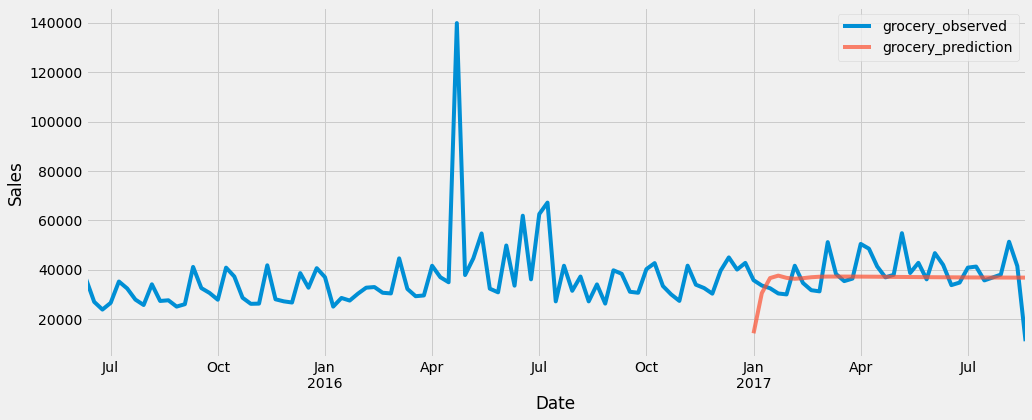

In [227]:
ax = y.plot(label='grocery_observed')
p.plot(ax=ax, label='grocery_prediction', alpha=.7, figsize = (15,6))

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

# Produce

In [228]:
y = data['produce_Unit_Sales']#['2017-01-01':]

In [229]:
p = pred['produce_Unit_Sales']

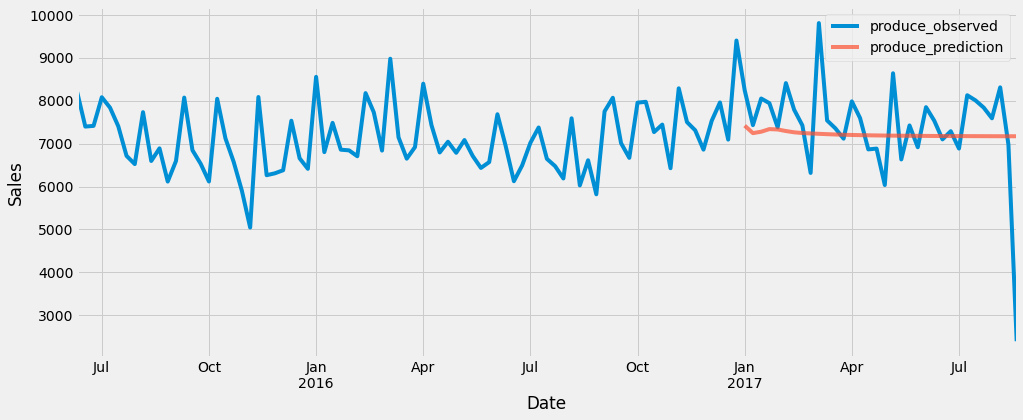

In [230]:
ax = y.plot(label='produce_observed')
p.plot(ax=ax, label='produce_prediction', alpha=.7, figsize = (15,6))

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

# Liquor_Wine_Beer

In [231]:
y = data['liquor_wine_beer_Unit_Sales']#['2017-01-01':]
p = pred['liquor_wine_beer_Unit_Sales']

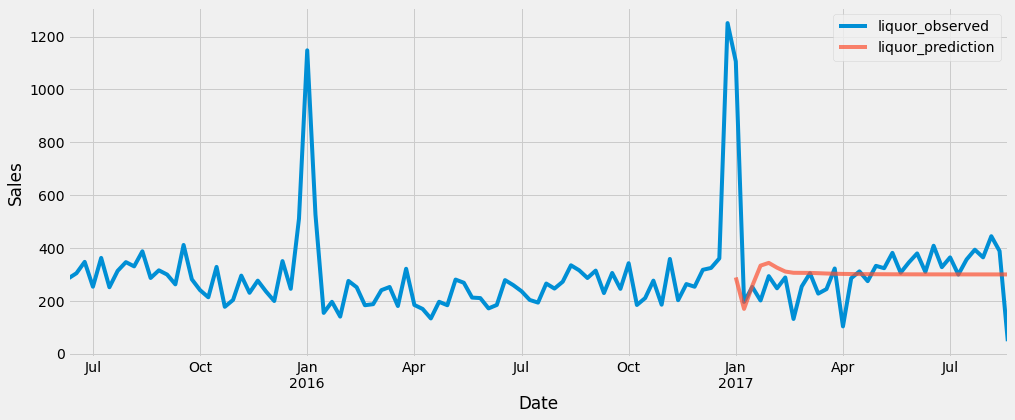

In [232]:
ax = y.plot(label='liquor_observed')
p.plot(ax=ax, label='liquor_prediction', alpha=.7, figsize = (15,6))


ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

# Home Care

In [233]:
y = data['home_care_Unit_Sales']#['2017-01-01':]
p = pred['home_care_Unit_Sales']

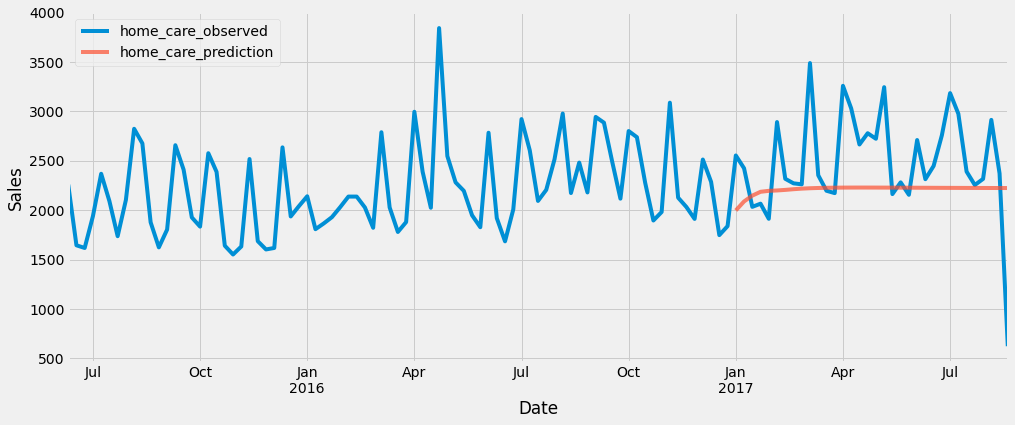

In [234]:
ax = y.plot(label='home_care_observed')
p.plot(ax=ax, label='home_care_prediction', alpha=.7, figsize = (15,6))

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

# Frozen food

In [235]:
y = data['frozen_prepared_food_Unit_Sales']#['2017-01-01':]
p = pred['frozen_prepared_food_Unit_Sales']

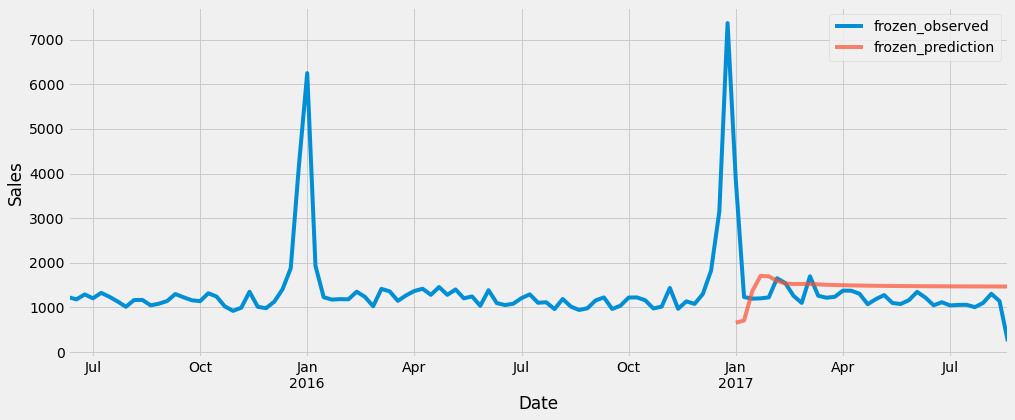

In [236]:
ax = y.plot(label='frozen_observed')
p.plot(ax=ax, label='frozen_prediction', alpha=.7, figsize = (15,6))

ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()